# LinearRegression (Công thức)

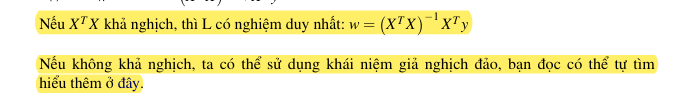
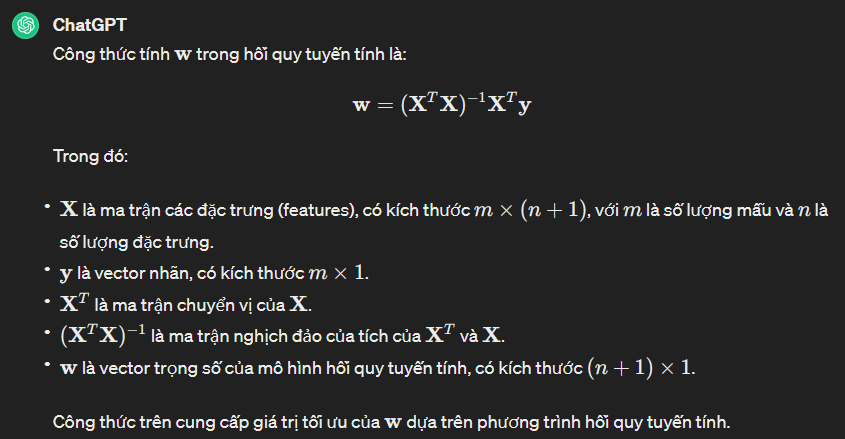

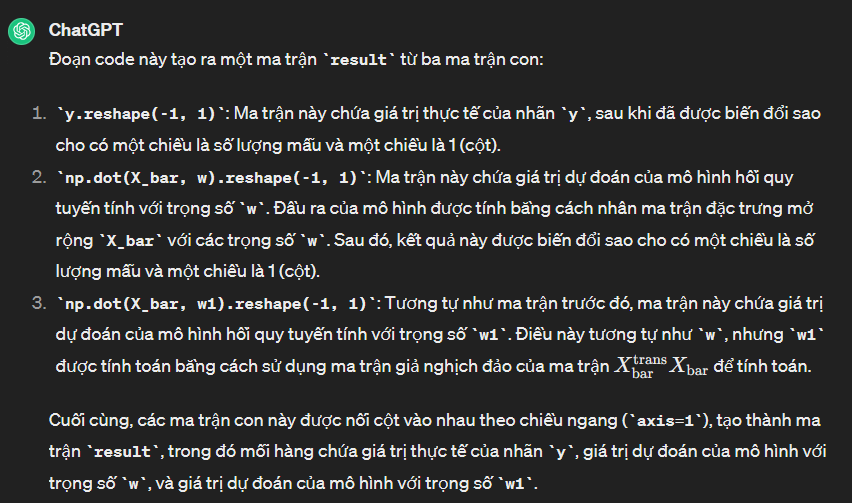

<h2><strong style="color:red">Công thức tính Gradient</strong> (Dùng trong cả Linear và Logistic)</h2>

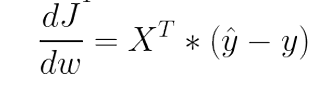

# LinearRegression Pure (thuần) (Phiên bản ngắn gọn dễ hiểu hơn)
# By : NVM 

- Tiền xử lí dữ liệu 
    + Chuẩn hóa các cột có giá trị lớn về khoảng 0 -> 1 . Vì có quá nhiều số lớn nhân lại với nhau khi tính toán sẽ dẫn đến NAN 
    + Số quá lớn nhưng learning rate chỉ có bước nhảy là 0.05 => quá nhỏ không ảnh hưởng đến w (không phù hợp) 
    + Luôn cần phải có tiền xử lí dữ liệu trước khi train (Xử lí dữ liệu null , trống , ngoại lệ . Chuẩn hóa dữ liệu ,...)

### Lưu ý quan trọng 

- Phải khai báo như này : 
    + w = np.zeros((X.shape[1], 1))

- Chứ còn đây là nghiệm luôn rồi  
    + w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y) # w = (X^T . X)^-1 . X^T . y 

#### Mục đích của hàm Gradient là đi tìm nghiệm (tìm giá trị gần giống với nghiệm) cho những hàm mà mình khó có thể tìm ra nghiệm sau khi đã đạo hàm xong , ở đây chỉ là do mình đã đạo hàm và tìm ra được nghiệm của nó . Còn những phương pháp khác như hồi quy logstic thì khó có thể tìm ra được nghiệm sau khi đã đạo hàm xong  


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv("USA_Housing.csv")

# Tiề xử lí dữ liệu
def remove_outliers(df, column): # Xử lí dữ liệu ngoại lệ
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

def preprocess_data(data):
    data = data.dropna() # Xóa dữ liệu null 
    data = data.drop(["Address"], axis=1) # xóa cột địa chỉ 
    
    cols_to_check = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
    
    # Xử lí dữ liệu ngoại lệ 
    for col in cols_to_check:
        data = remove_outliers(data, col)

    # Chuẩn hóa dữ liệu [QUAN TRỌNG]
    for col in cols_to_check:
        data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min()) # Chuẩn hóa theo dạng Min-max 

    return data

data = preprocess_data(data)
data.head() # nên để này ra riêng để in ra được , vì ipynb nếu in nhiều quá nó sẽ ẩn đi 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.691651,0.441624,0.501657,0.464444,0.254300,0.408279
1,0.686441,0.502017,0.450298,0.242222,0.573813,0.649991
2,0.371164,0.476163,0.779062,0.695556,0.512273,0.408255
3,0.407291,0.725698,0.239212,0.280000,0.464178,0.517319
4,0.348260,0.320416,0.654830,0.495556,0.315398,0.176719


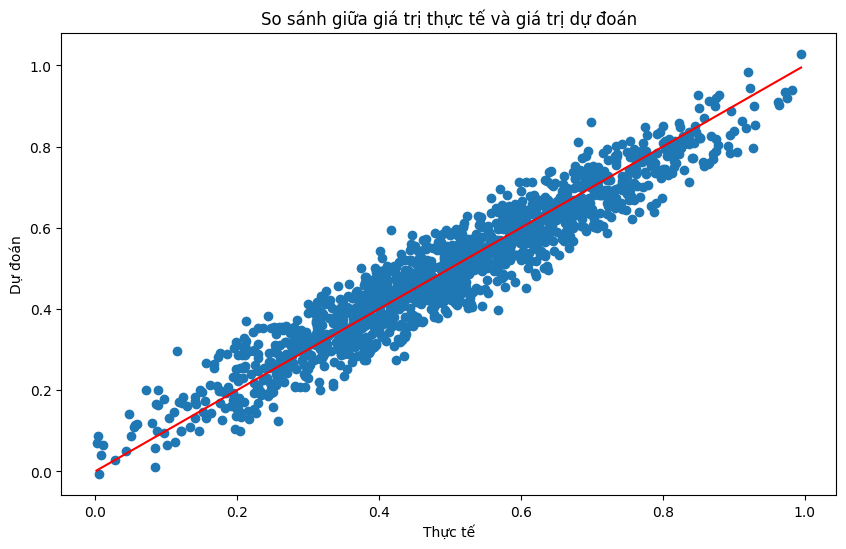

In [9]:
def matrix_transformation(x, y) : 
    x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1) # thêm cột 1 vào ma trận x , m*n+1 với n biến đầu vào mà m mẫu 
    y = np.array(y).reshape(-1, 1) # chuyển y thành ma trận m*1 (m mẫu trên 1 cột dự đoán)
    return x, y

# Hàm train 
def linear_regression(X, y, lr=0.05, epsilon=1e-10, epochs=100000):
    ep = 0
    N = X.shape[0]
    w = np.zeros((X.shape[1], 1)) 
    while ep < epochs:
        # Tính gradient
        gradient = np.dot(X.T, (np.dot(X, w) - y)) / N # gradient = X^T * (y^ - y)

        # Cập nhật trọng số
        w = w - lr * gradient
        
        # Kiểm tra điều kiện dừng trước khi đủ epochs=100000 , nếu đã hội tụ thì dừng luôn 
        if np.linalg.norm(gradient) < epsilon: # np.linalg.norm là phép đo độ lớn của vector hoặc ma trận trong không gian đa chiều.

            break
        
        ep += 1
    
    return w

# Hàm dự đoán
def predict(X, w):
    predictions = X.dot(w)
    
    return predictions

X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (70-30)
np.random.seed(42)  # Để đảm bảo kết quả được tái tạo
random_indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))

X_train = X.iloc[random_indices[:train_size]]
y_train = y.iloc[random_indices[:train_size]].values
X_test = X.iloc[random_indices[train_size:]]
y_test = y.iloc[random_indices[train_size:]].values

X_train, y_train = matrix_transformation(X_train, y_train)
X_test, y_test = matrix_transformation(X_test, y_test)

w = linear_regression(X_train, y_train, lr=0.05, epsilon=1e-10, epochs=100000) # huấn luyện 
predictions = predict(X_test, w) # đầu ra kết quả dự đoán 

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Vẽ đường chéo màu đỏ
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('So sánh giữa giá trị thực tế và giá trị dự đoán')
plt.show()


        # w = np.zeros((X.shape[1], 1)) <- Phải khai báo w init như này 
        # w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y) # w = (X^T . X)^-1 . X^T . y # Còn như này là tìm ra nghiệm của nó luôn rồi 
        # X^T = X.T
        # X.T.dot(X) = X^T . X
        # np.linalg.inv(X.T.dot(X)) = (X^T . X)^-1

        # pinv = tính ma trận nghịch đảo của bất kì ma trận nào => nên dùng này  
        # inv = tính ma trận nghịch đảo cho ma trận vuông 

        # Hàm np.linalg.norm() trong thư viện NumPy được sử dụng để tính toán chuẩn (norm) của một vector hoặc ma trận. Chuẩn là một phép đo độ lớn của vector hoặc ma trận trong không gian đa chiều.

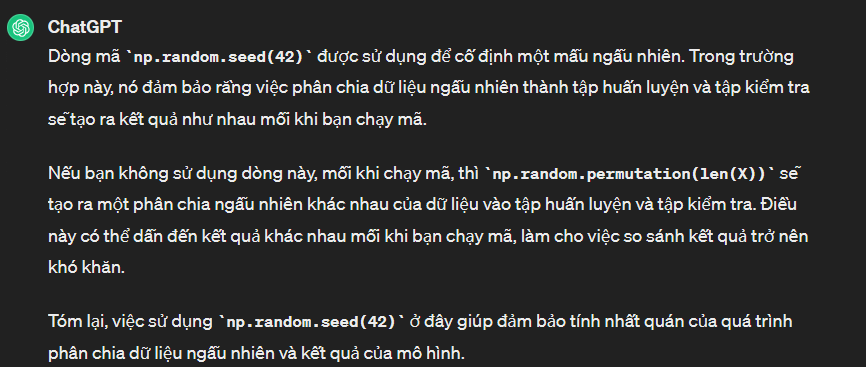

In [10]:
# Dữ liệu thử nghiệm
m, n = X_train.shape

# Hàm tính Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Hàm tính Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Hàm tính R squared (R^2)
def r_squared(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Hàm tính Adjusted R squared
def adjusted_r_squared(y_true, y_pred, n_features):
    r2 = r_squared(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - n_features - 1))
    return adjusted_r2

# Hàm tính Root Mean Squared Error (RMSE)
def rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return np.sqrt(mse)

# Hàm tính Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

# Hàm tính Mean Percentage Error (MPE)
def mpe(y_true, y_pred):
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    return mpe

# In kết quả
print("1. Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("2. Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("3. R squared (R^2):", r_squared(y_test, predictions))
print("4. Adjusted R squared:", adjusted_r_squared(y_test, predictions, n))
print("5. Root Mean Squared Error (RMSE):", rmse(y_test, predictions))
print("6. Mean Absolute Percentage Error (MAPE):", mape(y_test, predictions))
print("7. Mean Percentage Erro (MPE):", mpe(y_test, predictions))

1. Mean Squared Error (MSE): 0.003178039786028864
2. Mean Absolute Error (MAE): 0.04545861870542932
3. R squared (R^2): 0.9047526806524266
4. Adjusted R squared: 0.9043585538137471
5. Root Mean Squared Error (RMSE): 0.05637410563395985
6. Mean Absolute Percentage Error (MAPE): 15.850811992850804
7. Mean Percentage Erro (MPE): -5.470074928600987


# Gradient Descent 

In [11]:
def gradient_descent(learning_rate = 0.1, epoches = 1000, epsilon = 1e-10, initial_x = any):
    x = initial_x
    for _ in range(epoches):
        gradient = 2 * x + 2  # gradient là đạo hàm của hàm f(x) = x^2 + 2x + 5 . 
        x = x - learning_rate * gradient  # Cập nhật giá trị của x
        print('gradient', gradient)
        # điều kiện dừng sớm (so sánh x_old và x_new) nếu chưa đủ epoches nhưng độ chênh lệch không lớn 
        if (learning_rate * gradient < epsilon) :
            break

    return x

def f(x):
    return x**2 + 2*x + 5

optimal_x = gradient_descent(0.05, 10000, 1e-20, 0)
optimal_f = f(optimal_x)

print("Giá trị nhỏ nhất của hàm f(x) là:", optimal_f)
print("Khi x =", optimal_x)


gradient 2
gradient 1.8
gradient 1.62
gradient 1.458
gradient 1.3121999999999998
gradient 1.18098
gradient 1.0628819999999999
gradient 0.9565937999999998
gradient 0.8609344199999998
gradient 0.7748409779999998
gradient 0.6973568801999999
gradient 0.6276211921799999
gradient 0.564859072962
gradient 0.5083731656657999
gradient 0.45753584909921985
gradient 0.41178226418929786
gradient 0.3706040377703681
gradient 0.3335436339933313
gradient 0.30018927059399814
gradient 0.27017034353459835
gradient 0.24315330918113842
gradient 0.21883797826302454
gradient 0.19695418043672208
gradient 0.17725876239304994
gradient 0.15953288615374506
gradient 0.14357959753837046
gradient 0.12922163778453344
gradient 0.1162994740060801
gradient 0.10466952660547202
gradient 0.09420257394492482
gradient 0.08478231655043222
gradient 0.07630408489538909
gradient 0.0686736764058502
gradient 0.06180630876526516
gradient 0.055625677888738734
gradient 0.05006311009986497
gradient 0.045056799089878474
gradient 0.040551


Ví dụ với bộ tham số : gradient_descent(0.05, 10000, 1e-20, 0) => đã đủ thành công , vừa chạy nhanh vừa ra kết quả chính xác 
Các tham số truyền vào không hợp lí sẽ dẫn đến các hệ quả như đã nói trong sách (tạo ra các kết quả không tốt : chạy lâu hoặc hội tụ sớm làm kết quả không chính xác)

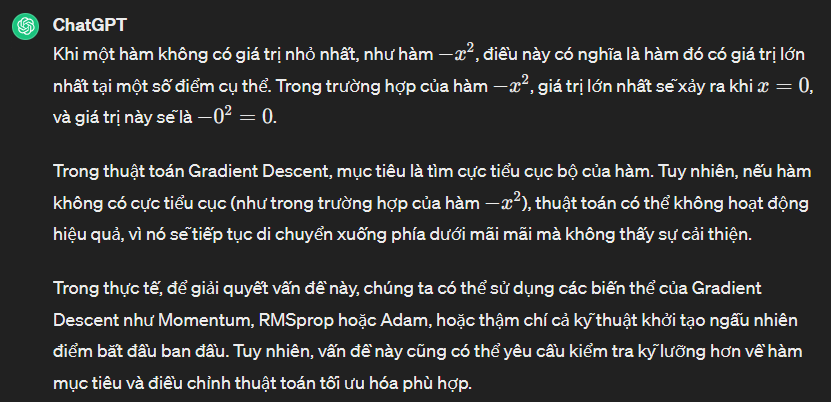

# Sử dụng hàm thư viện LinearRegression của sklearn . version 1.0

In [12]:
# Code you have previously used to load data
import pandas as pd

# Path of the file to read
iowa_file_path = './USA_Housing.csv'

home_data = pd.read_csv(iowa_file_path)
home_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Missing Value

In [13]:
# Đếm số lượng giá trị bị thiếu trong mỗi cột
missing_values = home_data.isnull().sum()

# Hiển thị số lượng giá trị bị thiếu
missing_values

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### Outliers

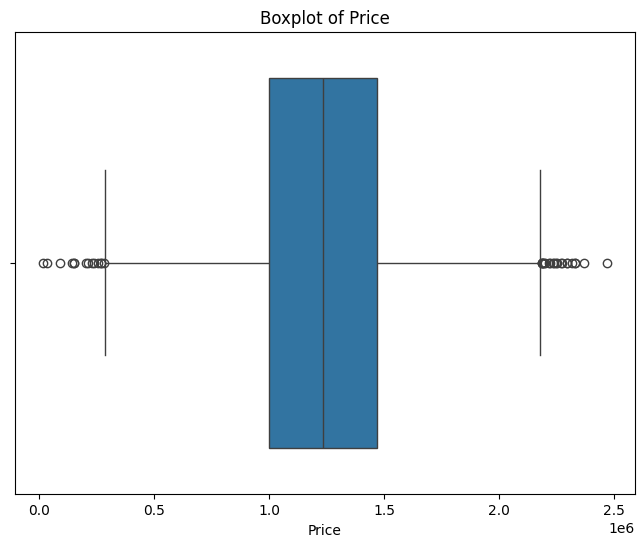

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ví dụ về boxplot cho cột 'Price' trong dữ liệu
plt.figure(figsize=(8, 6))
sns.boxplot(x=home_data['Price'])
plt.title('Boxplot of Price')
plt.show()


In [15]:
# Loại bỏ các dòng có 'Price' cao hơn ngưỡng
upper_threshold = 2000000
home_data = home_data[home_data['Price'] < upper_threshold]

# Loại bỏ các dòng có 'Price' thấp hơn ngưỡng
lower_threshold = 500000
home_data = home_data[home_data['Price'] > lower_threshold]


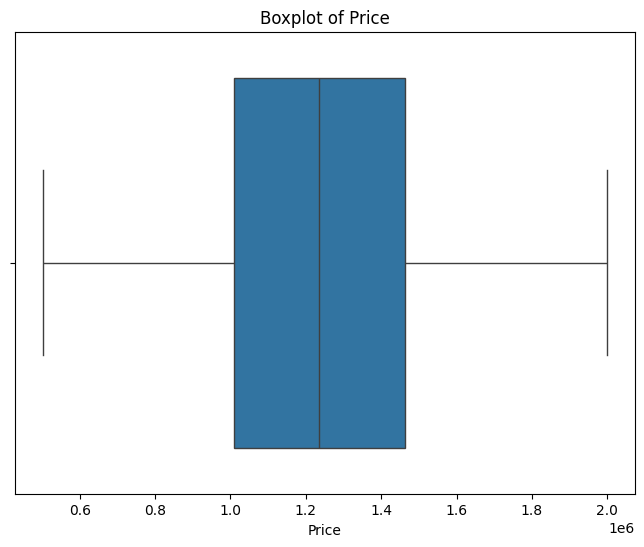

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ví dụ về boxplot cho cột 'Price' trong dữ liệu
plt.figure(figsize=(8, 6))
sns.boxplot(x=home_data['Price'])
plt.title('Boxplot of Price')
plt.show()


### Feature Selection

In [17]:
# Create the list of features below
feature_names = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']

# select data corresponding to features in feature_names
X = home_data[feature_names]
y = home_data.Price

### Review Data

In [18]:
X.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
count,4829.000000,4829.000000,4829.000000,4829.000000
mean,68631.173030,5.981569,6.990018,36219.821571
std,10228.405642,0.979918,0.988695,9791.566310
min,35454.714659,2.797215,3.236194,172.610686
25%,61688.682939,5.339340,6.313062,29506.487348
50%,68854.090852,5.976152,7.007676,36215.962546
75%,75582.459765,6.647406,7.661923,42857.370958
max,104702.724257,9.519088,10.144988,69621.713378


In [19]:
y.describe()

count    4.829000e+03
mean     1.235602e+06
std      3.191051e+05
min      5.025531e+05
25%      1.009094e+06
50%      1.234610e+06
75%      1.462899e+06
max      1.998369e+06
Name: Price, dtype: float64

### Split data

In [20]:
from sklearn.model_selection import train_test_split
# Break off validation set from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                      random_state=0)
print(len(X_train))
print(len(X_test))

3380
1449


### Fit Model

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

### Make Predictions


In [22]:
# Get validation predictions and MAE
y_predict = model.predict(X_test)

# Chuyển đổi các giá trị dự đoán sang dạng chuỗi định dạng số thực
formatted_predictions = ['{:.2f}'.format(prediction) for prediction in y_predict]

# Tạo DataFrame từ dữ liệu định dạng lại
output = pd.DataFrame({'HouseIndex': X_test.index,
                       'PredictPrice': formatted_predictions})

# Xuất ra file CSV mà không bao gồm cột index
output.to_csv('submission.csv', index=False)
output.head()


,HouseIndex,PredictPrice
0,4821,1431548.26
1,2619,1006208.25
2,1406,1576047.10
3,4796,1260699.91
4,4790,1333996.58


### Evalution MAE

In [23]:
mae = mean_absolute_error(y_test, y_predict)
print("MAE (trung bình sai số):", mae)

# Giá trị trung bình của biến mục tiêu (giá nhà trung bình)
avg = y_test.mean()
print("Giá nhà trung bình:", avg)

print("Phần trăm sai số của MAE so với giá nhà trung bình: ", round(mae / avg * 100, 2), '%')

MAE (trung bình sai số): 92605.45857366575
Giá nhà trung bình: 1234747.024953508
Phần trăm sai số của MAE so với giá nhà trung bình:  7.5 %


### Visualization Result


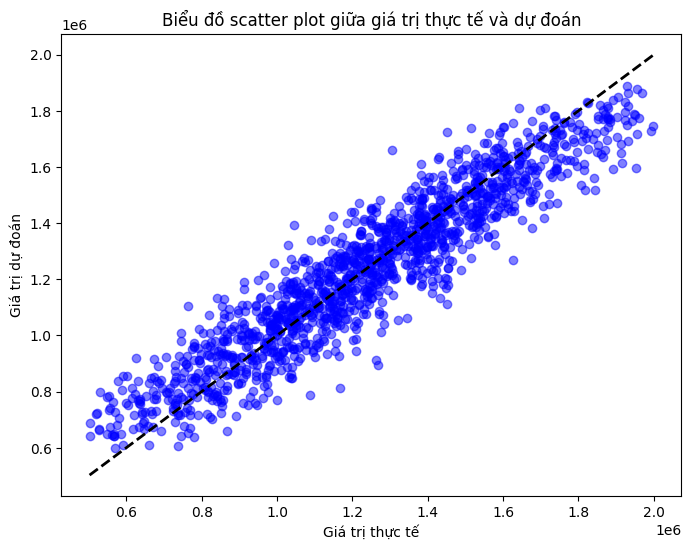

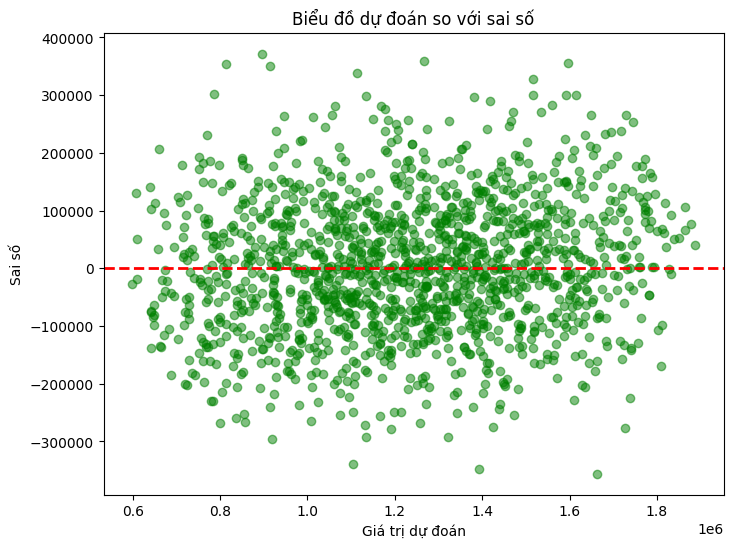

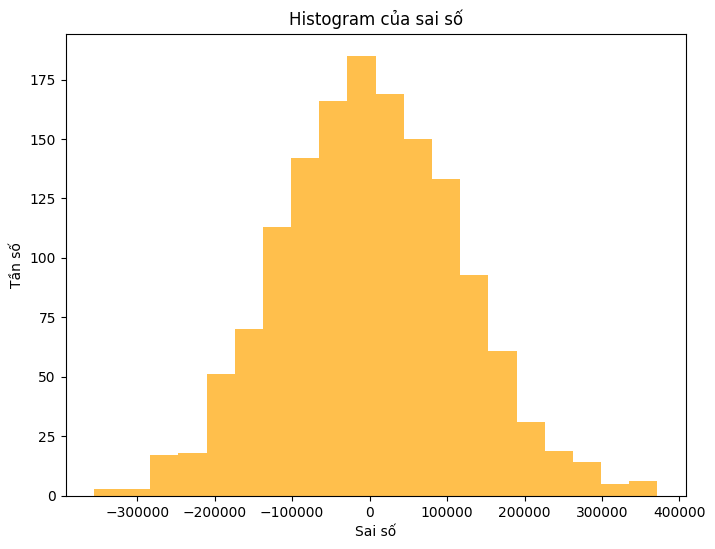

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử y_test và y_predict là hai mảng chứa giá trị thực tế và giá trị dự đoán tương ứng
# Cần phải đảm bảo rằng y_test và y_predict có cùng độ dài

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Đường chéo 45 độ
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ scatter plot giữa giá trị thực tế và dự đoán')
plt.show()

# Biểu đồ dự đoán so với sai số
residuals = y_test - y_predict
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Sai số')
plt.title('Biểu đồ dự đoán so với sai số')
plt.show()

# Histogram của sai số
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='orange', alpha=0.7)
plt.xlabel('Sai số')
plt.ylabel('Tần số')
plt.title('Histogram của sai số')
plt.show()

# Sử dụng hàm thư viện LinearRegression của sklearn . vesion 2.0
Cả hai cách import đều cho phép bạn sử dụng class LinearRegression từ module sklearn.linear_model.

`from sklearn.linear_model import LinearRegression` : Đây là cách import chỉ đặc tả trực tiếp class LinearRegression từ module sklearn.linear_model, sau đó bạn có thể sử dụng nó trực tiếp mà không cần phải sử dụng tên module khi gọi.

`import sklearn.linear_model as LinearRegression` : Đây là cách import module sklearn.linear_model với bí danh (alias) là LinearRegression. Khi sử dụng class LinearRegression, bạn phải thêm tên module trước tên của class. Ví dụ: LinearRegression.LinearRegression().

Cả hai cách đều cho kết quả giống nhau, chỉ là cách gọi và sử dụng khác nhau một chút. Việc lựa chọn cách nào phụ thuộc vào sở thích của bạn và sự tiện lợi trong quản lý mã nguồn.

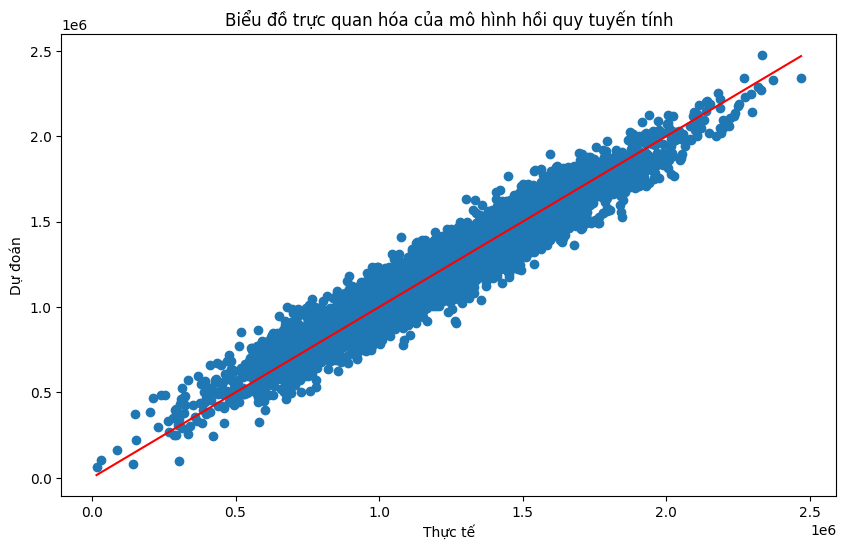

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Đọc dữ liệu từ file CSV
data = pd.read_csv("USA_Housing.csv")

# Chọn các đặc trưng và nhãn
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán giá nhà
predictions = model.predict(X)

# Vẽ biểu đồ trực quan hóa dữ liệu và đường hồi quy
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Vẽ đường chéo màu đỏ
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Vẽ đường chéo màu đỏ
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('Biểu đồ trực quan hóa của mô hình hồi quy tuyến tính')
plt.show()
